# Import libraries and datasets

In [1]:
# Import the libraries and tools to help us make this analysis
import pyreadstat
import pandas as pd
import functools
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Import data sets from file
politics_and_values_raw, meta = pyreadstat.read_sav("politics_and_values_wave_6.sav") 
personality_raw, meta = pyreadstat.read_sav("personality_wave_6.sav") 
background_variables_raw, meta = pyreadstat.read_sav("background_variables_2013_10.sav") 
twitter_raw, meta = pyreadstat.read_sav("twitter.sav")

## Cleaning data
We are only taking out the varaibles in the list

In [2]:
politics_and_values_clean  = politics_and_values_raw[['nomem_encr','cv13f012','cv13f050']]
personality_clean          = personality_raw[['nomem_encr','cp13f020','cp13f021','cp13f022','cp13f023','cp13f024','cp13f025','cp13f026','cp13f027','cp13f028','cp13f029','cp13f030','cp13f031','cp13f032','cp13f033','cp13f034','cp13f035','cp13f036','cp13f037','cp13f038','cp13f039','cp13f040','cp13f041','cp13f042','cp13f043','cp13f044','cp13f045','cp13f046','cp13f047','cp13f048','cp13f049','cp13f050','cp13f051','cp13f052','cp13f053','cp13f054','cp13f055','cp13f056','cp13f057','cp13f058','cp13f059','cp13f060','cp13f061','cp13f062','cp13f063','cp13f064','cp13f065','cp13f066','cp13f067','cp13f068','cp13f069']]
background_variables_clean = background_variables_raw[['nomem_encr','geslacht','leeftijd','nettoink','oplzon']]
twitter_clean              = twitter_raw[['nomem_encr','jz13a042','jz13a043','jz13a044','jz13a045','jz13a046']]

# Put all the data into one list
dfs = [politics_and_values_clean,personality_clean,background_variables_clean,twitter_clean]

# Join data sets

In [3]:
# Helper function to join our datasets
def join_dfs(ldf, rdf):
    return ldf.merge(rdf,on='nomem_encr', how='inner')

final_df = functools.reduce(join_dfs, dfs) #that's the magic
final_df = final_df.dropna()

In [4]:

#ax = final_df[["oplzon"]].plot.hist(alpha=0.5)

final_df.groupby('oplzon').count()

,nomem_encr,cv13f012,cv13f050,cp13f020,cp13f021,cp13f022,cp13f023,cp13f024,cp13f025,cp13f026,cp13f027,cp13f028,cp13f029,cp13f030,cp13f031,cp13f032,cp13f033,cp13f034,cp13f035,cp13f036,cp13f037,cp13f038,cp13f039,cp13f040,cp13f041,cp13f042,cp13f043,cp13f044,cp13f045,cp13f046,cp13f047,cp13f048,cp13f049,cp13f050,cp13f051,cp13f052,cp13f053,cp13f054,cp13f055,cp13f056,cp13f057,cp13f058,cp13f059,cp13f060,cp13f061,cp13f062,cp13f063,cp13f064,cp13f065,cp13f066,cp13f067,cp13f068,cp13f069,geslacht,leeftijd,nettoink,jz13a042,jz13a043,jz13a044,jz13a045,jz13a046
oplzon,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2.0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
3.0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
4.0,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
5.0,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
6.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
7.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Re-coding variables

In [5]:
# Cleaning up unwanted values in our data
final_df["nettoink"] = [np.NaN if element in [-13,-14,-15] else element for element in final_df["nettoink"]]
#final_df["oplzon"]   = [0 if element in [7,8,9] else element for element in final_df["oplzon"]]
final_df["geslacht"] = [1 if element == 1 else 0 for element in final_df["geslacht"]]
final_df["cv13f012"] = [0 if element == 3 else 1 for element in final_df["cv13f012"]]
final_df["cv13f050"] = [0 if element == 2 else 1 for element in final_df["cv13f050"]]

Reversing scales of varaibles

In [6]:
final_df['cp13f021'] = 6 - final_df['cp13f021']
final_df['cp13f031'] = 6 - final_df['cp13f031']
final_df['cp13f041'] = 6 - final_df['cp13f041']
final_df['cp13f051'] = 6 - final_df['cp13f051']
final_df['cp13f027'] = 6 - final_df['cp13f027']
final_df['cp13f037'] = 6 - final_df['cp13f037']
final_df['cp13f047'] = 6 - final_df['cp13f047']
final_df['cp13f057'] = 6 - final_df['cp13f057']
final_df['cp13f023'] = 6 - final_df['cp13f023']
final_df['cp13f033'] = 6 - final_df['cp13f033']
final_df['cp13f043'] = 6 - final_df['cp13f043']
final_df['cp13f048'] = 6 - final_df['cp13f048']
final_df['cp13f053'] = 6 - final_df['cp13f053']
final_df['cp13f058'] = 6 - final_df['cp13f058']
final_df['cp13f063'] = 6 - final_df['cp13f063']
final_df['cp13f068'] = 6 - final_df['cp13f068']
final_df['cp13f025'] = 6 - final_df['cp13f025']
final_df['cp13f035'] = 6 - final_df['cp13f035']
final_df['cp13f045'] = 6 - final_df['cp13f045']
final_df['cp13f055'] = 6 - final_df['cp13f055']
final_df['cp13f065'] = 6 - final_df['cp13f065']
final_df['cp13f029'] = 6 - final_df['cp13f029']
final_df['cp13f039'] = 6 - final_df['cp13f039']
final_df['cp13f049'] = 6 - final_df['cp13f049']

Aggregatre and sum varaibles

In [7]:
final_df['agreeableness']      = final_df[['cp13f026', 'cp13f036', 'cp13f046', 'cp13f056', 'cp13f061', 'cp13f066', 'cp13f021', 'cp13f031', 'cp13f041', 'cp13f051']].sum(axis=1)
final_df['conscientiousness']  = final_df[['cp13f022', 'cp13f032', 'cp13f042', 'cp13f052', 'cp13f062', 'cp13f067', 'cp13f027', 'cp13f037', 'cp13f047', 'cp13f057']].sum(axis=1)
final_df['emotionalstability'] = final_df[['cp13f028', 'cp13f038', 'cp13f023', 'cp13f033', 'cp13f043', 'cp13f048', 'cp13f053', 'cp13f058', 'cp13f063', 'cp13f068']].sum(axis=1)
final_df['extraversion']       = final_df[['cp13f020','cp13f030','cp13f040','cp13f050','cp13f060','cp13f025','cp13f035','cp13f045','cp13f055','cp13f065']].sum(axis=1)
final_df['openness']           = final_df[['cp13f024', 'cp13f034', 'cp13f044', 'cp13f054', 'cp13f059', 'cp13f064', 'cp13f069', 'cp13f029', 'cp13f039', 'cp13f049']].sum(axis=1)

final_df['var_TPP']  = final_df[['jz13a042','jz13a043','jz13a044','jz13a045','jz13a046']].sum(axis=1)
final_df["bin_var_TPP"] = [1 if element > 5 else 0 for element in final_df["var_TPP"]]


Drop unnessccary variables

In [9]:
#Specify columns to drop
drop_these_columns = ['nomem_encr', 
                      'cp13f026', 'cp13f036', 'cp13f046', 'cp13f056', 'cp13f061', 'cp13f066', 'cp13f021', 'cp13f031', 'cp13f041', 'cp13f051','cp13f022', 'cp13f032', 'cp13f042', 'cp13f052', 'cp13f062', 'cp13f067', 'cp13f027', 'cp13f037', 'cp13f047', 'cp13f057','cp13f028', 'cp13f038', 'cp13f023', 'cp13f033', 'cp13f043', 'cp13f048', 'cp13f053', 'cp13f058', 'cp13f063', 'cp13f068','cp13f020','cp13f030','cp13f040','cp13f050','cp13f060','cp13f025','cp13f035','cp13f045','cp13f055','cp13f065','cp13f024', 'cp13f034', 'cp13f044', 'cp13f054', 'cp13f059', 'cp13f064', 'cp13f069', 'cp13f029', 'cp13f039', 'cp13f049',
                     'jz13a042','jz13a043','jz13a044','jz13a045','jz13a046'
                     ]

#Execute dropping of columns
final_df = final_df.drop(drop_these_columns, axis = 1) 


Turn into categorical variables

In [10]:
def turn_into_categorical_variables(df,column,is_ordered,categories):
    print(column)
    if is_ordered:
        return df[column].astype("category", ordered=is_ordered, categories=categories)
    else:
        return df[column].astype("category", ordered=is_ordered)

categorical_varaibles = {
    'cv13f050':[False, None], 
    'cv13f012':[False, None],
    'geslacht':[False, None],
    'oplzon':[True, [0,1,2,3,4,5,6,7,8,9]],
    'bin_var_TPP':[False, None]
}

for key,value in categorical_varaibles.items():
    final_df[key] = turn_into_categorical_variables(df=final_df,column=key,is_ordered=value[0],categories=value[1])

cv13f050
cv13f012
geslacht
oplzon
bin_var_TPP


# Get dummy variables

In [11]:
#Specify columns should be turned into dummy
these_are_the_columns_to_convert_to_dummy =  ['cv13f050', 'cv13f012', 'geslacht','oplzon']

#Execute dummy
final_df_with_dummies = pd.get_dummies(final_df, columns=these_are_the_columns_to_convert_to_dummy)
final_df_with_dummies.head()

,leeftijd,nettoink,agreeableness,conscientiousness,emotionalstability,extraversion,openness,var_TPP,bin_var_TPP,cv13f050_0,cv13f050_1,cv13f012_0,cv13f012_1,geslacht_0,geslacht_1,oplzon_0,oplzon_1,oplzon_2,oplzon_3,oplzon_4,oplzon_5,oplzon_6,oplzon_7,oplzon_8,oplzon_9
17,18.0,0.0,41.0,32.0,25.0,33.0,39.0,8.0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0
22,60.0,1621.0,40.0,36.0,40.0,34.0,32.0,5.0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
31,57.0,2200.0,41.0,42.0,37.0,33.0,42.0,7.0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
38,29.0,1400.0,35.0,34.0,37.0,29.0,34.0,5.0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
46,41.0,2500.0,35.0,38.0,40.0,42.0,39.0,6.0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [16]:
#final_df_with_dummies
final_df_with_dummies['oplzon_7'].value_counts()

0    240
1      1
Name: oplzon_7, dtype: int64

In [17]:
final_df_with_dummies['oplzon_8'].value_counts()

0    241
Name: oplzon_8, dtype: int64

In [18]:

final_df_with_dummies['oplzon_9'].value_counts()

0    241
Name: oplzon_9, dtype: int64

# Lets train the model

In [10]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

# class for getting statistical information like p value
class LogisticReg:
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values

        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij
        return self

    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self
# Function for training model
def train_model(X,y, algorithm):
    if algorithm == 'logistic':
        model=LogisticReg()
    elif algorithm == 'OLS':
        model=LinearRegression()
    return model.fit(X,y)

In [11]:
model_version = {
    'Model 1': {'y':final_df_with_dummies[['bin_var_TPP']],
                'X':final_df_with_dummies[['agreeableness','conscientiousness','emotionalstability','extraversion','openness']],
                'algorithm': 'logistict'
               },
    'Model 2': {'y':final_df_with_dummies[['bin_var_TPP']],
                'X':final_df_with_dummies[['agreeableness','conscientiousness','emotionalstability','extraversion','openness','leeftijd','nettoink','geslacht_0','geslacht_1','oplzon_0','oplzon_1','oplzon_2','oplzon_3','oplzon_4','oplzon_5','oplzon_6']],
                'algorithm': 'logistict'
               },
    'Model 3': {'y':final_df_with_dummies[['bin_var_TPP']],
                'X':final_df_with_dummies[['agreeableness','conscientiousness','emotionalstability','extraversion','openness','leeftijd','nettoink','geslacht_0','geslacht_1','oplzon_0','oplzon_1','oplzon_2','oplzon_3','oplzon_4','oplzon_5','oplzon_6','cv13f050_0','cv13f050_1','cv13f012_0','cv13f012_1']],
                'algorithm': 'logistict'
               }
}

for key,value in model_version.items():
    print(key, 'is being trained')
    value['trained_model'] = train_model(X=value['X'], y=value['y'], algorithm=value['algorithm'])


Model 1 is being trained
Model 2 is being trained
Model 3 is being trained


#### Show model coefficents

In [12]:
print("Model 1 \n", model_version['Model 1']['trained_model'].model.coef_,'\n')
print("Model 2 \n", model_version['Model 2']['trained_model'].model.coef_,'\n')
print("Model 3 \n", model_version['Model 3']['trained_model'].model.coef_,'\n')

Model 1 
 [[-0.07687653 -0.01613688 -0.01380459  0.02330486  0.08283368]] 

Model 2 
 [[-6.33966704e-02 -3.13335556e-02 -3.13091553e-02  3.17366003e-02
   6.97474660e-02  1.69486800e-02 -5.04570940e-05 -6.53394625e-01
   2.35600087e-01 -1.35020031e-01 -4.93588343e-01 -1.97639728e-01
   4.63377976e-02  1.20873597e-01  1.29809705e-01  1.11432465e-01]] 

Model 3 
 [[-5.58567587e-02 -2.82206614e-02 -3.23004472e-02  3.39002571e-02
   6.95570997e-02  1.71144321e-02 -9.70787630e-05 -6.51079671e-01
   2.48279389e-01 -1.26517927e-01 -5.29734775e-01 -7.20679055e-02
   8.25364052e-02  1.94439633e-01  8.56901966e-02 -3.71459101e-02
  -5.82317610e-01  1.79517327e-01 -3.56965953e-01 -4.58343299e-02]] 



#### Show model P-values

In [13]:
print("Model 1 \n", model_version['Model 1']['trained_model'].p_values,'\n')
print("Model 2 \n", model_version['Model 2']['trained_model'].p_values,'\n')
print("Model 3 \n", model_version['Model 3']['trained_model'].p_values,'\n')

Model 1 
 [0.009678479203321723, 0.5440068515030672, 0.5373382612122406, 0.3490989427775876, 0.005669014179205217] 

Model 2 
 [0.059810438908949076, 0.30304353305089116, 0.20230935534975292, 0.2402082695744645, 0.06469364818707518, 0.17896840557935767, 0.7943750590420063, nan, nan, nan, nan, nan, nan, nan, nan, nan] 

Model 3 
 [0.10398724164864769, 0.3634386142648989, 0.20577740350248475, 0.2196226659568843, 0.07882657351429068, 0.1893353579839655, 0.6242517353021126, nan, nan, 0.9999999906248586, 0.9999999648075459, 0.9999999949237954, 0.9999999950440657, 0.9999999873970368, 0.9999999950474179, 0.9999999977589631, 0.9999999561089523, 0.9999999864356388, nan, nan] 



#### Create verification data

In [14]:
import copy 

def create_list_of_columns(data_frame):
    return list(data_frame.columns)

def create_predicted_probabilities_matrix(model_dictionary, version=''):
   
    for key, value in model_dictionary.items():
        if key == version:
            list_of_x_values = create_list_of_columns(value['X'])
            list_of_x_values.insert(0,'X_variable_to_change')
            empty_df = pd.DataFrame(columns=list_of_x_values)
            
            min_value_list  = []
            mean_value_list = []
            max_value_list  = []

            for num, col_name in enumerate(create_list_of_columns(value['X']), start=0):
                min_value_list.append(model_dictionary[key]['X'][col_name].min())
                mean_value_list.append(model_dictionary[key]['X'][col_name].mean())
                max_value_list.append(model_dictionary[key]['X'][col_name].max())
                
            master_list = []
            
            for num, col_name in enumerate(list(value['X'].columns), start=0):                
                for agg_function in ['min','mean','max']:
                    row_list = copy.copy(mean_value_list)
                    if agg_function == 'min':
                        row_list[num]=min_value_list[num]
                    elif agg_function == 'mean':
                        row_list[num]=mean_value_list[num]
                    elif agg_function == 'max':
                        row_list[num]=max_value_list[num]
                    row_list.insert(0,col_name+'('+agg_function+')')
                    master_list.append(row_list)
                    del row_list
    
    _predict_prob_df = pd.DataFrame(master_list, columns=list_of_x_values)
    _predict_prob_df["predictions"] = np.nan
    return _predict_prob_df



for key, value in model_version.items():
    model_version[key]['predicted_probability'] = create_predicted_probabilities_matrix(model_version, key)


In [15]:
#model_version['Model 2']['predicted_probability']

#for index, row in model_version['Model 2']['predicted_probability'].iterrows():
#    _test = row#['geslacht_0']

#[[i] for i in list(_test[1:-1])]

In [16]:
for key, value in model_version.items():
    for index, row in value['predicted_probability'].iterrows():
        #if key == 'Model 1':
        #input_to_model = np.array([row['agreeableness'],row['conscientiousness'],row['emotionalstability'],row['extraversion'],row['openness']])
        
        input_to_model = np.array([[i] for i in list(row[1:-1])])
        predicted_value = value['trained_model'].predict_proba(input_to_model.reshape(1, -1))[:,1][0]
        value['predicted_probability'].at[index,'predictions'] = predicted_value

In [17]:
#for key, value in model_version.items():
#    for index, row in predict_prob_df.iterrows():
#        if key == 'Model 1':
#            input_to_model = np.array([row['agreeableness'],row['conscientiousness'],row['emotionalstability'],row['extraversion'],row['openness']])
#            predicted_value = value['trained_model'].predict_proba(input_to_model.reshape(1, -1))[:,1][0]
#            predict_prob_df.at[index,'predictions'] = predicted_value
#predict_prob_df

In [18]:
def plot_fig(dictionary,version, width=20,heigth=8):
    figure(num=None, figsize=(width, heigth), dpi=80, facecolor='w', edgecolor='k')
    for key, value in dictionary.items():
        if key == version:
            #plt.barh(predict_prob_df['X_variable_to_change'], predict_prob_df['predictions'])
            _x = value['predicted_probability']['X_variable_to_change']
            _y = value['predicted_probability']['predictions']
            plt.barh(_x,_y)

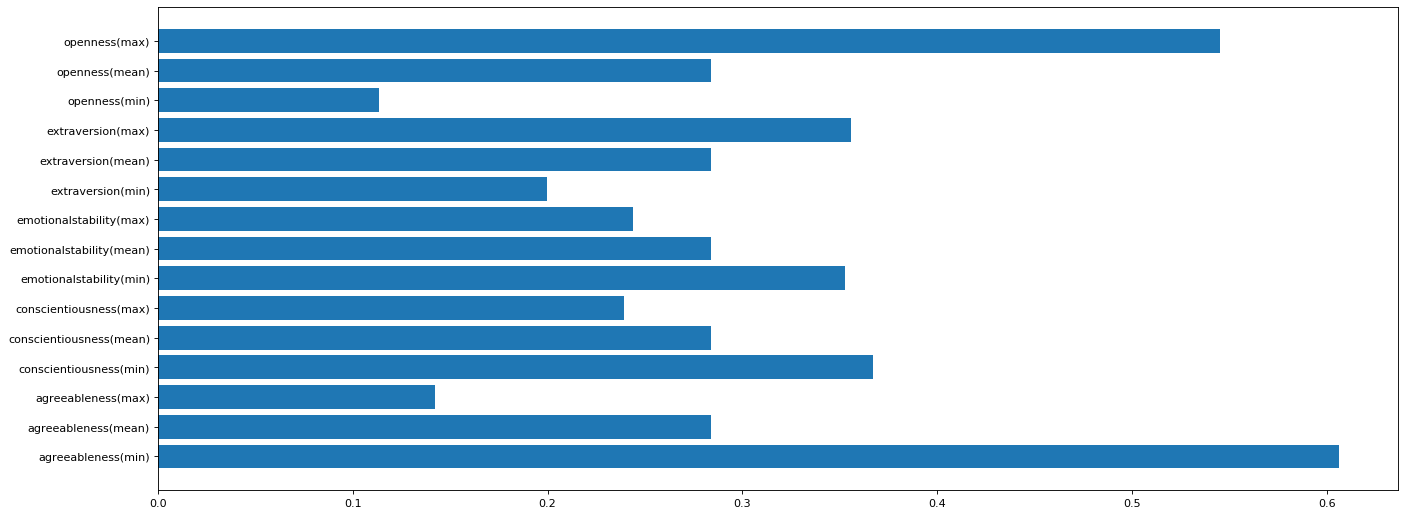

In [19]:
plot_fig(dictionary=model_version,version='Model 1')

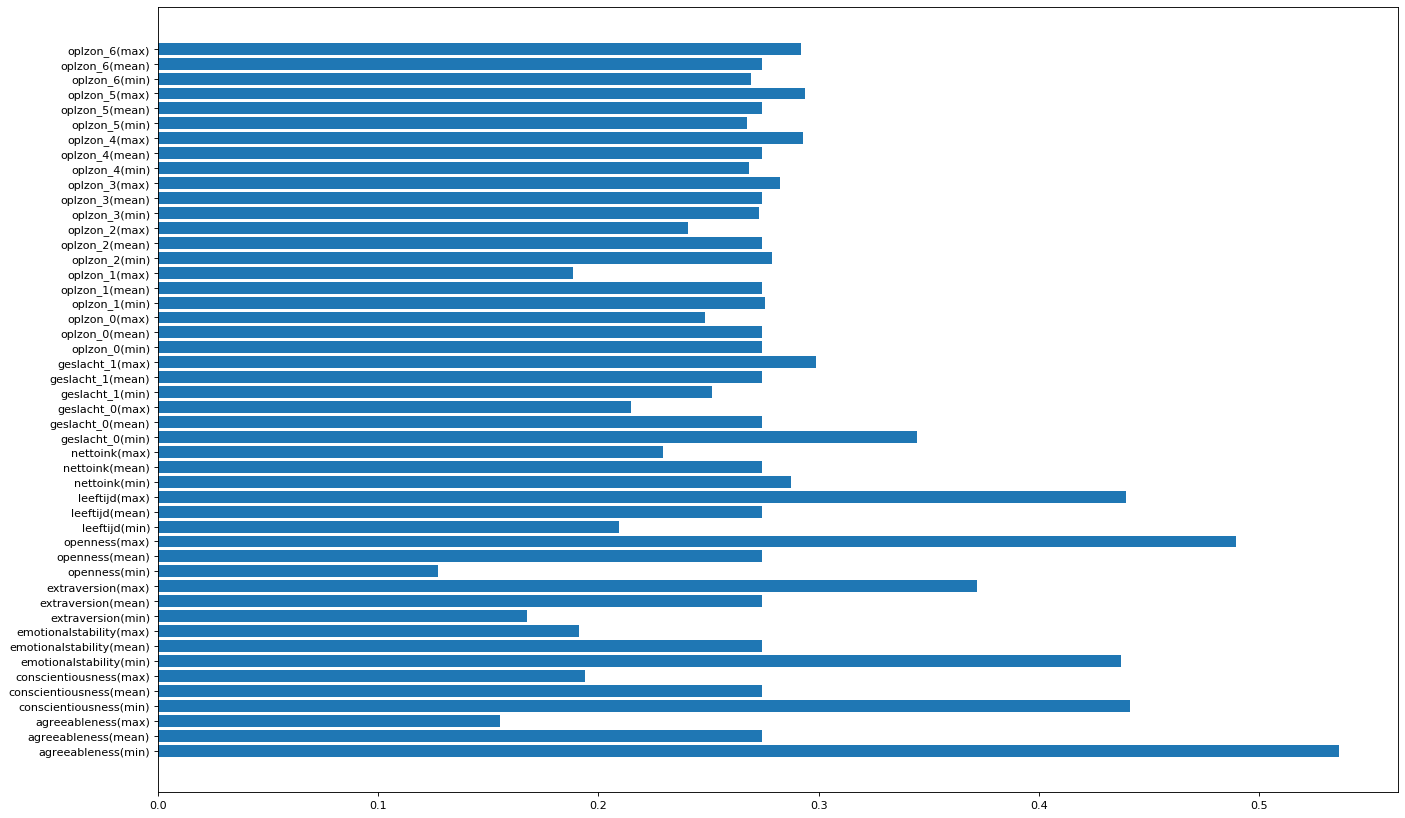

In [20]:
plot_fig(dictionary=model_version,version='Model 2',width=20,heigth=13)

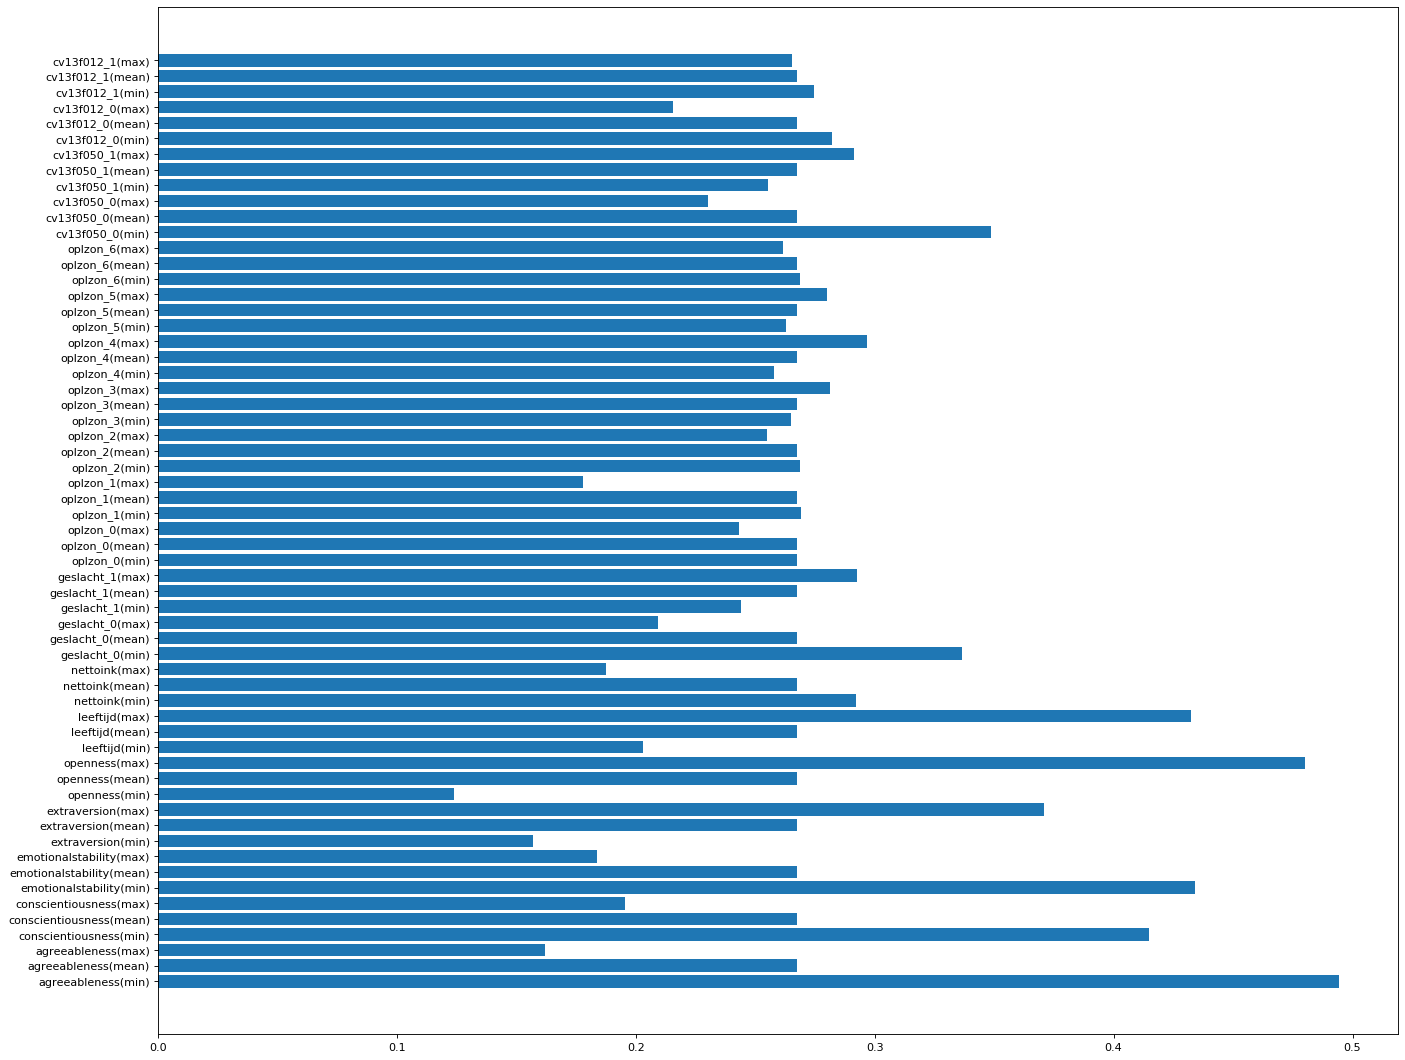

In [21]:
plot_fig(dictionary=model_version,version='Model 3',width=20,heigth=17)